# 지하철 이용객 분석
- https://data.busan.go.kr/
- 승하차 인원 정보 검색
- 일별역별시간대별승하차 파일 받기
- 최신 csv 파일로 받기
- 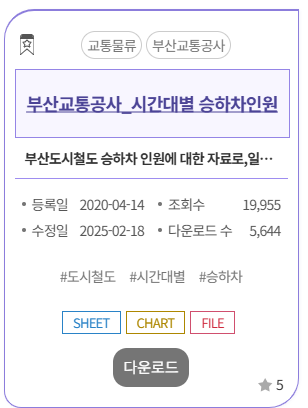

In [ ]:
import pandas as pd
file_path = "./ref/일별역별시간대별승하차인원(2025년1월).csv"
df = pd.read_csv(file_path,encoding="EUC-KR")
df.head() #맨 앞데이터 5개 들고오기
#data.tail() #맨 뒤데이터 5개 들고오기

In [18]:
columns0 = ['num','name','date','week','type','total']
time_col = [f"{i}~{i+1}h"for i in range(1,24)]
columns = columns0 + time_col + ["24h~01h"]
df.columns = columns
df = df.loc[:,:"total"]

In [ ]:
df

In [ ]:
data = df.groupby(['num','name','date']).sum().reset_index()
data
#groupby는 특정 기준으로 그룹화를 시켜주는 것이다.
#뒤에 붙은 sum은 같은 값을 하나로 합쳐주는데 지금은 역 이름을 합치고 있다.
#reset_index는 합쳐져 있는 값이나 다른값을 다시 인덱스화 시키는걸말한다.

In [ ]:
gdata = data[["name","date","total"]]
gdata = gdata.sort_values(by=["name","date"], ascending=[True,True])
gdata.head(10)
#sort_values는 값을 설정하고 설정한 값을 기준대로 나열한다. 
#ascending은 오름차순과 내림차순을 정할 수 있고 True는 오름차순, False는 내림차순이다.

In [ ]:
mdata = gdata.groupby(by="name").sum().reset_index()
tdata = mdata[["name",'total']]
tdata

In [ ]:
sdata = tdata.sort_values(by="total",ascending=[False])
sdata.head(10)

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

In [ ]:
for font in fm.findSystemFonts():
    print(font)
#print(plt.rcParams["font.family"])

In [ ]:
!pip install squarify

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import squarify
import pandas as pd

d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

file_path = "./ref/CARD_SUBWAY_MONTH_202501.csv"
df = pd.read_csv(file_path)
columns = ['name','subway','in','out','day','etx']
df.columns = columns
df = df.loc[:,:"in"]
mdata = df.groupby(by="subway").sum().reset_index()
tdata = mdata[["subway",'in']]
tdata
idata = tdata.sort_values(by="in",ascending=[False])
idata.head(10)
plt.figure(figsize=(12,5))
squarify.plot(sizes=idata["in"].iloc[:20],label=idata["subway"].iloc[:20],alpha=0.7)
plt.rcParams['font.size'] = 22
plt.gca().invert_yaxis()
plt.axis("off")
plt.savefig("subway01.png")
plt.show()

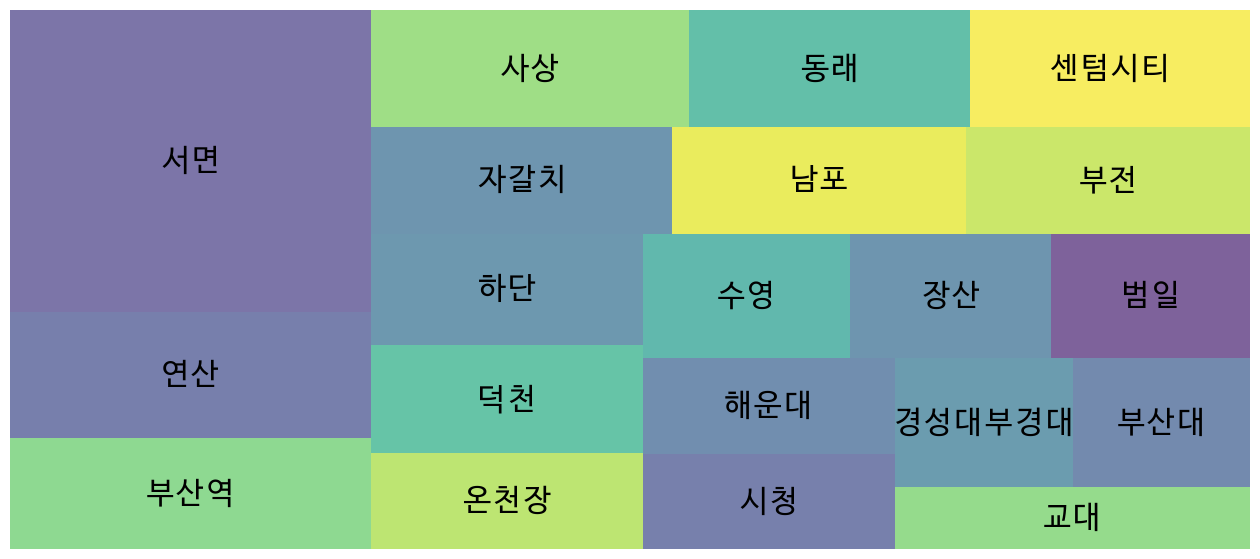

In [27]:
import squarify
plt.figure(figsize=(16,7))
squarify.plot(sizes=sdata["total"].iloc[:20],label=sdata["name"].iloc[:20],alpha=0.7)
plt.rcParams['font.size'] = 22
plt.gca().invert_yaxis()
plt.axis("off")
plt.savefig("subway.png")
plt.show()

### 지하철 이용료 현황(부산)

- 전반적인 데이터 분석

부산의 중심지라고 볼 수 있는 서면이 가장 큰 지하철이용량을 보여주고 있음.
전반적으로 2호선이 높은 사용량을 보여주고 있으며 대학교 앞 지하철의 사용량도 높은 사용량을 띄고 있음. 서면을 제외한 나머지 역은 사용량이 크게 차이가 나지 않는 반면 사용량이 가장 큰 서면과 그다음 사용량이 높은 연산과의 차이는 거의 2배가량의 차이를 보여주고 있음. 